# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations and Comments: 

There are more cities in the sample population located in the Northern Hemisphere then Southern Hemisphere. 

As shown in the longitude vs latitude png file, one is able to content shapes. There appears to be a correlation between latitude and temperature. For the Southern Hemisphere, there appears to be a linear correlation from 0 degrees (equator) and as one moves South the temperature decreases. In the case of the Northern Hemisphere, a similar trend starts at ~20 degrees  and as one moves North  the temperature decreases. Likewise, in the Northern hemisphere the temperature between 0 – 20 degrees North latitude appears to be in the similar range, which can be explained by it being summer in the Northern latitudes. 

Humidity is not directly impacted by latitude and can be impacted by proximity to oceans, climate, altitude, etc. 

There appears to be no correlations between cloudiness and latitude / proximity to the equator. More impacted / influenced by geographical location and daily weather. 
 
Windspeeds for most cities are between 0 – 15 mph. Anything above 15 mph appears to be an outlier which may indicate a storm / severe weather effect. 



In [28]:
# Import dependencies

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import json
import requests
import scipy.stats as st
import requests as req
import pandas as pd
from pprint import pprint
from datetime import datetime
from citipy import citipy
    
# API Keys needed
from api_keys import weather_api_key
from api_keys import g_key

## Generate Cities List

In [3]:
# Number of random numbers to be generated
y = 1500

# For instance, latitude, or y, values are between -90 and +90
# Randmoly generate latitude coordinates. For Y numbers. 
city_data = pd.DataFrame()
city_data['random_latitude'] = [np.random.uniform(-90,90) for i in range (y)]

# For instance, longitude, or x, values are between -180 and +180
# Randomly generate langitude coordinates. For Y numbers. 
city_data['random_longitude'] = [np.random.uniform(-180,180) for i in range (y)]

# city_data.head()


In [4]:
closest_city = []
host_country = []
latitude = []
longitude = []

# Find the closest city
for index,row in city_data.iterrows():
    lat = row['random_latitude']
    long = row['random_longitude']
    city = citipy.nearest_city(lat, long).city_name
    country = citipy.nearest_city(lat, long).country_code
    
# Review and drop any duplicate cities due to random lat / long proximity.
    if city not in closest_city:
        closest_city.append(city)
        host_country.append(country)
        latitude.append(lat)
        longitude.append(long)

# Creating dataframe and formatting
closest_city = [x.upper() for x in closest_city]
host_country = [x.upper() for x in host_country]
summary_df=pd.DataFrame({"Random Latitude": latitude, "Random Longitude": longitude, "Closest City": closest_city, 
                         "Country": host_country})
summary_df.head()

,Random Latitude,Random Longitude,Closest City,Country
0,-26.310622,45.322109,TSIHOMBE,MG
1,-78.198815,-140.374156,RIKITEA,PF
2,50.915050,6.890981,HURTH,DE
3,78.096553,-82.448758,QAANAAQ,GL
4,-36.666097,-47.200653,RIO GRANDE,BR


In [5]:
 # Confirm the number of cities is greater than 500
len(closest_city)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [7]:
# Create lists for different response information
weather_city = []
weather_country =[]
weather_date=[]
weather_country = []
weather_latitude = []
weather_longitude = []
weather_temperature_F = []
weather_humidity_percent = []
weather_cloudiness_percent = []
weather_wind_speed_mph = []

x = 1

# Build query for different cities. 

print(' ')
print('Start of Records')
print(' ')

for city in closest_city:
        query_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=" + units 
        print(f'Retrieving information for {city}. City number {x} of {len(closest_city)}.')
        print(query_url)
        
# Get Weather Data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

# Collect the requested information
        try:
            weather_city.append(weather_json['name'])
            weather_country.append(weather_json['sys']['country'])
            weather_date.append(weather_json['dt'])
            weather_latitude.append(weather_json['coord']['lat'])
            weather_longitude.append(weather_json['coord']['lon'])
            weather_temperature_F.append(weather_json['main']['temp_max'])
            weather_humidity_percent.append(weather_json['main']['humidity'])
            weather_cloudiness_percent.append(weather_json['clouds']['all'])
            weather_wind_speed_mph.append(weather_json['wind']['speed'])

            x = x + 1
            print(' ')

# Capture when city is not found
        except:
            print(f'{city} was not Found')
            print(' ')
            x = x + 1 
            print(' ')

# Timer to pause for a second after each record - not too exceed 60 API calls per minute limit
        time.sleep(1)
            
print(' ')
print('End of Records')
print(' ')

 
Start of Records
 
Retrieving information for TSIHOMBE. City number 1 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=TSIHOMBE&units=imperial
TSIHOMBE was not Found
 
 
Retrieving information for RIKITEA. City number 2 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=RIKITEA&units=imperial
 
Retrieving information for HURTH. City number 3 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=HURTH&units=imperial
 
Retrieving information for QAANAAQ. City number 4 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=QAANAAQ&units=imperial
 
Retrieving information for RIO GRANDE. City number 5 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=RIO GRANDE&units=imperial
 
Retrieving information for CAMACHA. City number 6 of 585.
http://api.openweathermap.org/data/2.

 
Retrieving information for GALLUP. City number 48 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=GALLUP&units=imperial
 
Retrieving information for ANDAPA. City number 49 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ANDAPA&units=imperial
 
Retrieving information for VARDO. City number 50 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=VARDO&units=imperial
 
Retrieving information for ATUONA. City number 51 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ATUONA&units=imperial
 
Retrieving information for YELLOWKNIFE. City number 52 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=YELLOWKNIFE&units=imperial
 
Retrieving information for BUSSELTON. City number 53 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a81

 
Retrieving information for MEULABOH. City number 95 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=MEULABOH&units=imperial
 
Retrieving information for DIKSON. City number 96 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=DIKSON&units=imperial
 
Retrieving information for SISIMIUT. City number 97 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=SISIMIUT&units=imperial
 
Retrieving information for PLATTEVILLE. City number 98 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PLATTEVILLE&units=imperial
 
Retrieving information for AIRAI. City number 99 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=AIRAI&units=imperial
 
Retrieving information for TUROCHAK. City number 100 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab2

 
Retrieving information for CHERSKIY. City number 141 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=CHERSKIY&units=imperial
 
Retrieving information for BERINGOVSKIY. City number 142 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BERINGOVSKIY&units=imperial
 
Retrieving information for BELOHA. City number 143 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BELOHA&units=imperial
 
Retrieving information for GRAND RIVER SOUTH EAST. City number 144 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=GRAND RIVER SOUTH EAST&units=imperial
GRAND RIVER SOUTH EAST was not Found
 
 
Retrieving information for KENAI. City number 145 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KENAI&units=imperial
 
Retrieving information for SYAVA. City number 146 of 585.


 
Retrieving information for CAYENNE. City number 187 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=CAYENNE&units=imperial
 
Retrieving information for HAVERFORDWEST. City number 188 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=HAVERFORDWEST&units=imperial
 
Retrieving information for GORNOPRAVDINSK. City number 189 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=GORNOPRAVDINSK&units=imperial
 
Retrieving information for KITIMAT. City number 190 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KITIMAT&units=imperial
 
Retrieving information for PUERTO MADRYN. City number 191 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PUERTO MADRYN&units=imperial
 
Retrieving information for BAYKIT. City number 192 of 585.
http://api.openweathermap.org/data/2

 
Retrieving information for GABU. City number 233 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=GABU&units=imperial
 
Retrieving information for TRAIRI. City number 234 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=TRAIRI&units=imperial
 
Retrieving information for SALALAH. City number 235 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=SALALAH&units=imperial
 
Retrieving information for PEVEK. City number 236 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PEVEK&units=imperial
 
Retrieving information for PORT MACQUARIE. City number 237 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PORT MACQUARIE&units=imperial
 
Retrieving information for POMICHNA. City number 238 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab

 
Retrieving information for KAVARATTI. City number 280 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KAVARATTI&units=imperial
 
Retrieving information for KHANI. City number 281 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KHANI&units=imperial
 
Retrieving information for NERYUNGRI. City number 282 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=NERYUNGRI&units=imperial
 
Retrieving information for ROTIFUNK. City number 283 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ROTIFUNK&units=imperial
 
Retrieving information for KAMAISHI. City number 284 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KAMAISHI&units=imperial
 
Retrieving information for BACUIT. City number 285 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de

 
Retrieving information for SAMBAVA. City number 327 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=SAMBAVA&units=imperial
 
Retrieving information for ABU SAMRAH. City number 328 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ABU SAMRAH&units=imperial
 
Retrieving information for KEY WEST. City number 329 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KEY WEST&units=imperial
 
Retrieving information for LESHUKONSKOYE. City number 330 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=LESHUKONSKOYE&units=imperial
 
Retrieving information for WEST WENDOVER. City number 331 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=WEST WENDOVER&units=imperial
 
Retrieving information for ELAT. City number 332 of 585.
http://api.openweathermap.org/data/2.5/weath

Retrieving information for DHIDHDHOO. City number 374 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=DHIDHDHOO&units=imperial
 
Retrieving information for NORMAN WELLS. City number 375 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=NORMAN WELLS&units=imperial
 
Retrieving information for SEVERO-KURILSK. City number 376 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=SEVERO-KURILSK&units=imperial
 
Retrieving information for ZHIGANSK. City number 377 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ZHIGANSK&units=imperial
 
Retrieving information for BAFOULABE. City number 378 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BAFOULABE&units=imperial
 
Retrieving information for MARSA MATRUH. City number 379 of 585.
http://api.openweathermap.org/data/2

 
Retrieving information for LIMA DUARTE. City number 420 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=LIMA DUARTE&units=imperial
 
Retrieving information for PATROCINIO. City number 421 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PATROCINIO&units=imperial
 
Retrieving information for EYL. City number 422 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=EYL&units=imperial
 
Retrieving information for YAAN. City number 423 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=YAAN&units=imperial
 
Retrieving information for PARIT BUNTAR. City number 424 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PARIT BUNTAR&units=imperial
 
Retrieving information for NABIRE. City number 425 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154

 
Retrieving information for BOLUNGARVIK. City number 467 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BOLUNGARVIK&units=imperial
BOLUNGARVIK was not Found
 
 
Retrieving information for WEIHE. City number 468 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=WEIHE&units=imperial
 
Retrieving information for TURUKHANSK. City number 469 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=TURUKHANSK&units=imperial
 
Retrieving information for WHITEHORSE. City number 470 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=WHITEHORSE&units=imperial
 
Retrieving information for WODONGA. City number 471 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=WODONGA&units=imperial
 
Retrieving information for TAPES. City number 472 of 585.
http://api.openweathermap.org/d

Retrieving information for MARANA. City number 514 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=MARANA&units=imperial
 
Retrieving information for LOLUA. City number 515 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=LOLUA&units=imperial
LOLUA was not Found
 
 
Retrieving information for KYSYL-SYR. City number 516 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KYSYL-SYR&units=imperial
 
Retrieving information for MORTKA. City number 517 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=MORTKA&units=imperial
 
Retrieving information for GUA MUSANG. City number 518 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=GUA MUSANG&units=imperial
 
Retrieving information for KONTAGORA. City number 519 of 585.
http://api.openweathermap.org/data/2.5/weather?ap

Retrieving information for GALLE. City number 561 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=GALLE&units=imperial
 
Retrieving information for PORTO TORRES. City number 562 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PORTO TORRES&units=imperial
 
Retrieving information for HELONG. City number 563 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=HELONG&units=imperial
 
Retrieving information for SOLA. City number 564 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=SOLA&units=imperial
 
Retrieving information for SAN RAMON DE LA NUEVA ORAN. City number 565 of 585.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=SAN RAMON DE LA NUEVA ORAN&units=imperial
 
Retrieving information for TONJ. City number 566 of 585.
http://api.openweathermap.org/data/2.5/wea

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create DataFrame.

city_weather = pd.DataFrame({"City": weather_city, "Latitude": weather_latitude, "Longitude": weather_longitude,
                             "Max Temperature (F)": weather_temperature_F, "Humidity (%)": weather_humidity_percent,
                             "Cloudiness": weather_cloudiness_percent, "Wind Speed": weather_wind_speed_mph, 
                            "Country": weather_country, "Date":weather_date})
city_weather.head(25)

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,73.24,81,0,12.33,PF,1600023337
1,Hürth,50.87,6.87,73.99,60,20,1.07,DE,1600023338
2,Qaanaaq,77.48,-69.36,23.88,82,6,7.67,GL,1600023339
3,Rio Grande,-32.03,-52.10,64.40,100,90,11.41,BR,1600023092
4,Camacha,33.08,-16.33,75.20,69,20,8.05,PT,1600023342
5,Soe,-9.86,124.28,60.66,75,1,4.07,ID,1600023345
6,São Filipe,14.90,-24.50,79.36,80,100,12.28,CV,1600023346
7,Sur,22.57,59.53,80.04,70,0,12.15,OM,1600023348
8,Tuktoyaktuk,69.45,-133.04,39.20,86,90,24.16,CA,1600023349
9,Port Elizabeth,-33.92,25.57,57.20,76,0,13.87,ZA,1600023321


In [31]:
# Check to make sure each column is complete
city_weather.count()

City                   539
Latitude               539
Longitude              539
Max Temperature (F)    539
Humidity (%)           539
Cloudiness             539
Wind Speed             539
Country                539
Date                   539
dtype: int64

In [32]:
# Create a CSV File
city_weather.to_csv("City_Weather_Dataframe.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
humidity_check = pd.DataFrame(city_weather.groupby('City')['Humidity (%)'].max())
humidity_check = humidity_check.sort_values("Humidity (%)", ascending = False)
humidity_check.head(20)

,Humidity (%)
City,
Wodonga,100
Tateyama,100
Katsuura,100
Hambantota,100
Alyangula,100
Rio Grande,100
Port Hardy,100
Carnarvon,100
Portland,100


In [34]:
#  Get the indices of cities that have humidity over 100%.

# Based on the above table, no city has humidity greater than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

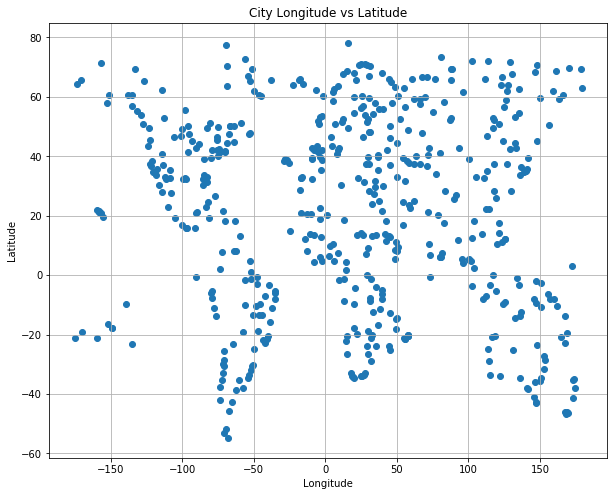

In [63]:
# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Longitude'], city_weather['Latitude'])
plt.title("City Longitude vs Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show
plt.savefig('Longitude_Latitude.png', bbox_inches='tight')

## Latitude vs. Temperature Plot

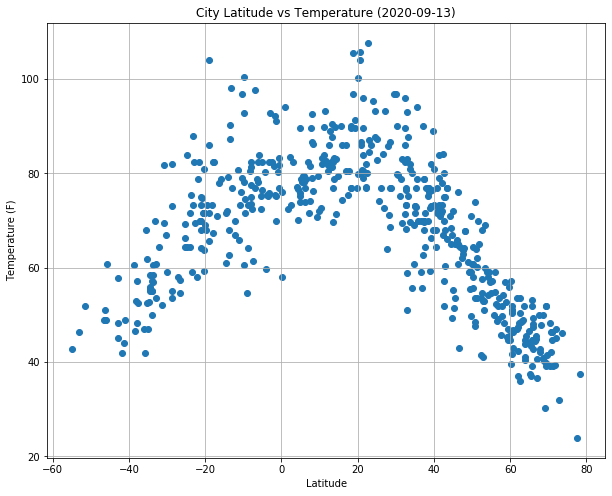

In [41]:
date = datetime.fromtimestamp(city_weather.loc[0,"Date"]).strftime('%Y-%m-%d')

# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Latitude'], city_weather['Max Temperature (F)'])
plt.title("City Latitude vs Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.show
plt.savefig('Latitude_Temperature.png', bbox_inches='tight')


## Latitude vs. Humidity Plot

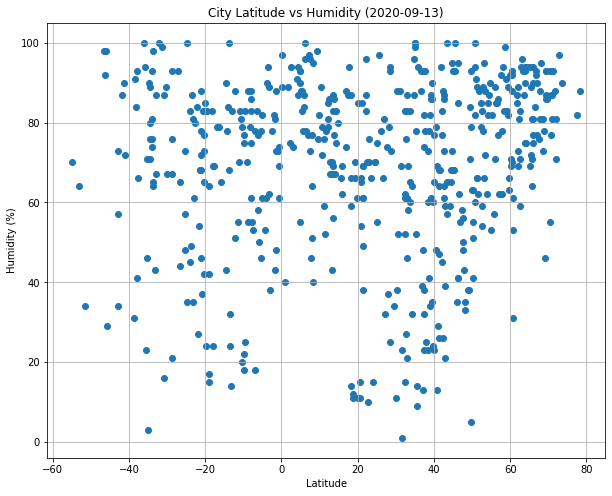

In [42]:
# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Latitude'], city_weather['Humidity (%)'])
plt.title("City Latitude vs Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show
plt.savefig('Latitude_Humidity.png', bbox_inches='tight')


## Latitude vs. Cloudiness Plot

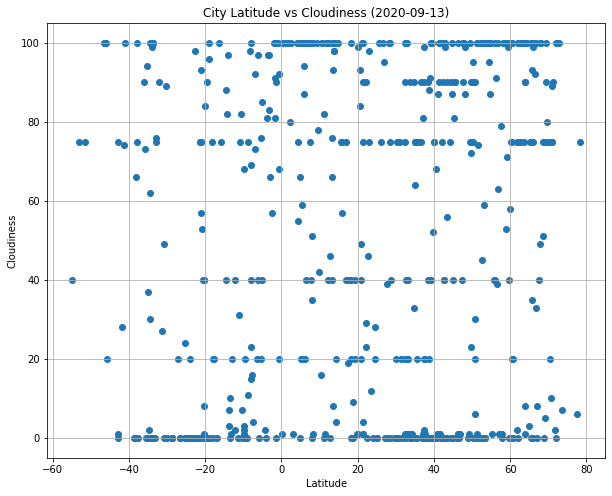

In [43]:
# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Latitude'], city_weather['Cloudiness'])
plt.title("City Latitude vs Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show
plt.savefig('Latitude_Cloudiness.png', bbox_inches='tight')

## Latitude vs. Wind Speed Plot

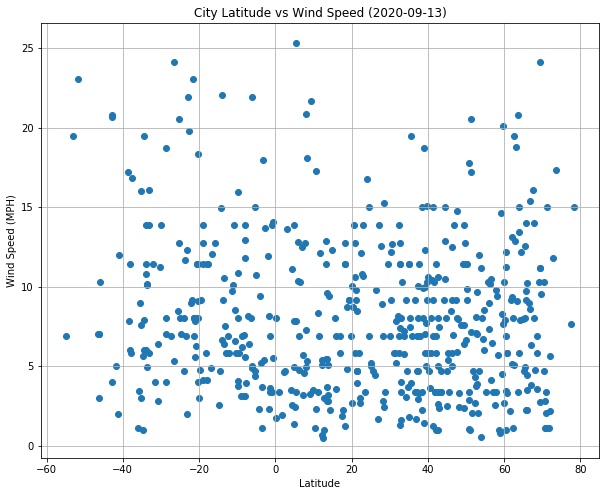

In [44]:
# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Latitude'], city_weather['Wind Speed'])
plt.title("City Latitude vs Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)
plt.show
plt.savefig('Latitude_WindSpeed.png', bbox_inches='tight')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [47]:
# Northern Hemisphere 
# Data for X-Axis (Latitude)
# Northern hemisphere greater than or equal to 0 degrees. Southern hemisphere less than 0 degrees.
latitude_north_df = city_weather[(city_weather["Latitude"]>=0)]
latitude_north_df.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness,Wind Speed,Country,Date
1,Hürth,50.87,6.87,73.99,60,20,1.07,DE,1600023338
2,Qaanaaq,77.48,-69.36,23.88,82,6,7.67,GL,1600023339
4,Camacha,33.08,-16.33,75.20,69,20,8.05,PT,1600023342
6,São Filipe,14.90,-24.50,79.36,80,100,12.28,CV,1600023346
7,Sur,22.57,59.53,80.04,70,0,12.15,OM,1600023348


The r-squared is: 0.684


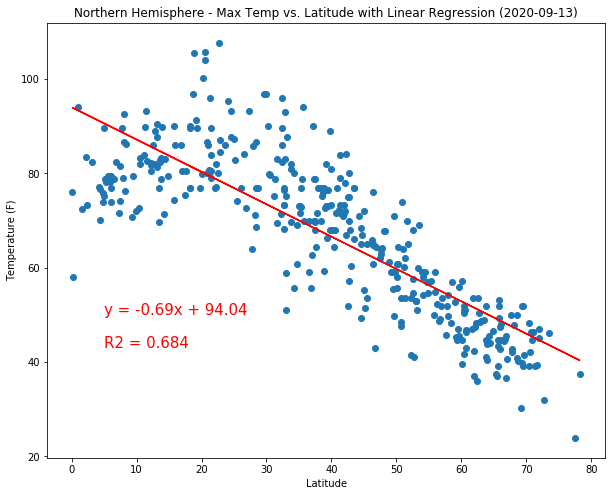

The correlation between Latitude and Temperature is: -0.827


In [53]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

# Data for X-Axis (latitude)
northern_latitude_axis = latitude_north_df.groupby(latitude_north_df["City"])["Latitude"].mean()
northern_latitude_axis

# Data for Y-axis (Max Temp)
northern_temperature_axis = latitude_north_df.groupby(latitude_north_df["City"])["Max Temperature (F)"].mean()
northern_temperature_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_latitude_axis, northern_temperature_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = northern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(northern_latitude_axis, northern_temperature_axis)

# Plot the regression line
plt.plot(northern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (5, 50), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (5, 43), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(northern_latitude_axis, northern_temperature_axis)[0],3)
print(f"The correlation between Latitude and Temperature is: {correlation}")


In [ ]:
# No strong correlation between latitude and temperature, but there is an obvious trend within the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [54]:
# Southern Hemisphere
# Northern hemisphere greater than or equal to 0 degrees. Southern hemisphere less than 0 degrees.
latitude_south_df = city_weather[(city_weather["Latitude"]<0)]
latitude_south_df.head()


,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,73.24,81,0,12.33,PF,1600023337
3,Rio Grande,-32.03,-52.10,64.40,100,90,11.41,BR,1600023092
5,Soe,-9.86,124.28,60.66,75,1,4.07,ID,1600023345
9,Port Elizabeth,-33.92,25.57,57.20,76,0,13.87,ZA,1600023321
10,Mataura,-46.19,168.86,48.99,98,100,7.00,NZ,1600023351


The r-squared is: 0.546


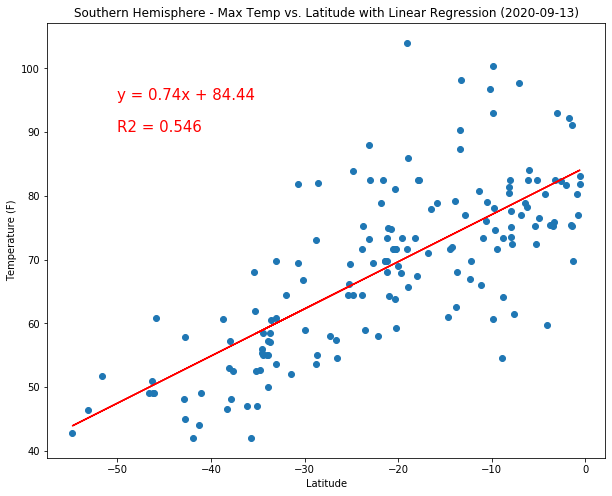

The correlation between Latitude and Temperature is: 0.739


In [55]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# Data for X-Axis (latitude)
southern_latitude_axis = latitude_south_df.groupby(latitude_south_df["City"])["Latitude"].mean()
southern_latitude_axis

# Data for Y-axis (Max Temp)
southern_temperature_axis = latitude_south_df.groupby(latitude_south_df["City"])["Max Temperature (F)"].mean()
southern_temperature_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_latitude_axis, southern_temperature_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = southern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(southern_latitude_axis, southern_temperature_axis)

# Plot the regression line
plt.plot(southern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 95), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50, 90), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(southern_latitude_axis, southern_temperature_axis)[0],3)
print(f"The correlation between Latitude and Temperature is: {correlation}")


# Similar to the Northern Hemsiphere, within the Southern Hemisphere there is a trend as between temperature and latitude
# and as one moves away from the equator the temperature becomes cooler.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.019


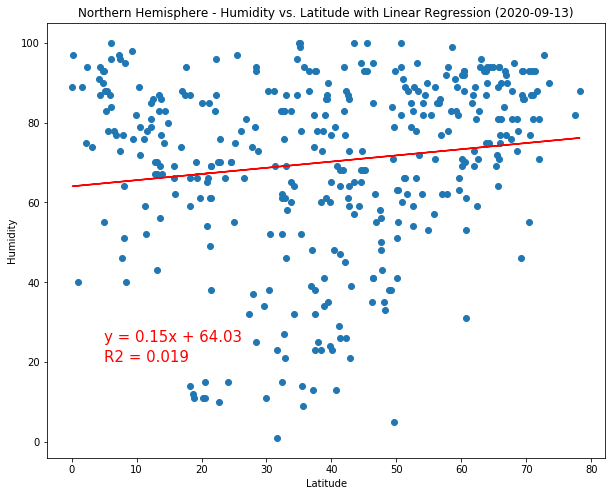

The correlation between Latitude and Humidity is: 0.138


In [57]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression

# Data for X-Axis (latitude)
northern_latitude_axis = latitude_north_df.groupby(latitude_north_df["City"])["Latitude"].mean()
northern_latitude_axis

# Data for Y-axis (Humidity)
northern_humidity_axis = latitude_north_df.groupby(latitude_north_df["City"])["Humidity (%)"].mean()
northern_humidity_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_latitude_axis, northern_humidity_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = northern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(northern_latitude_axis, northern_humidity_axis)

# Plot the regression line
plt.plot(northern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (5, 25), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (5, 20), fontsize=15, color="red")
plt.title("Northern Hemisphere - Humidity vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(northern_latitude_axis, northern_humidity_axis)[0],3)
print(f"The correlation between Latitude and Humidity is: {correlation}")


In [ ]:
# There is no correlation with Humidity vs Latitude for the Northern Hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005


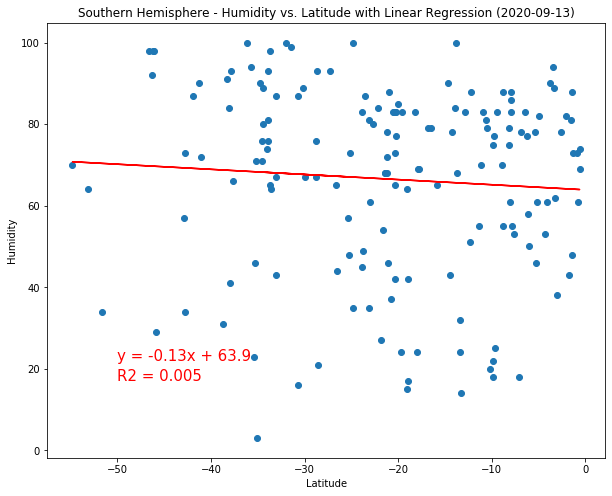

The correlation between Latitude and Humidity is: -0.072


In [58]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression

# Data for X-Axis (latitude)
southern_latitude_axis = latitude_south_df.groupby(latitude_south_df["City"])["Latitude"].mean()
southern_latitude_axis

# Data for Y-axis (Humidity)
southern_humidity_axis = latitude_south_df.groupby(latitude_south_df["City"])["Humidity (%)"].mean()
southern_humidity_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_latitude_axis, southern_humidity_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = southern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(southern_latitude_axis, southern_humidity_axis)

# Plot the regression line
plt.plot(southern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 22), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50, 17), fontsize=15, color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(southern_latitude_axis, southern_humidity_axis)[0],3)
print(f"The correlation between Latitude and Humidity is: {correlation}")


In [ ]:
# There is no correlation with Humidity vs Latitude for the Southern Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.001


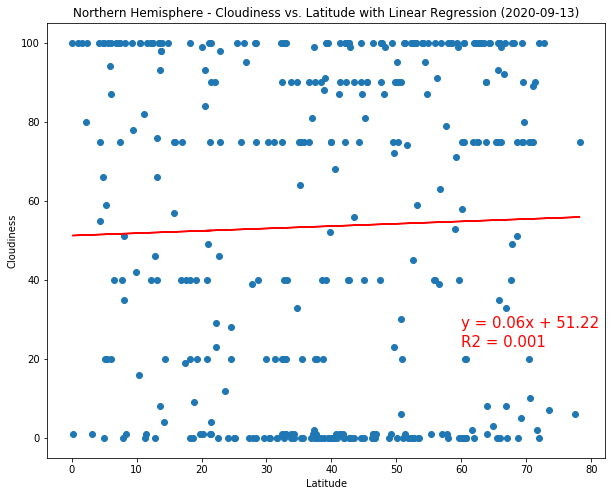

The correlation between Latitude and Cloudiness is: 0.029


In [59]:
# Northern Hemisphere - Cloudiness vs. Latitude Linear Regression

# Data for X-Axis (latitude)
northern_latitude_axis = latitude_north_df.groupby(latitude_north_df["City"])["Latitude"].mean()
northern_latitude_axis

# Data for Y-axis (Cloudiness)
northern_cloudiness_axis = latitude_north_df.groupby(latitude_north_df["City"])["Cloudiness"].mean()
northern_cloudiness_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_latitude_axis, northern_cloudiness_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = northern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(northern_latitude_axis, northern_cloudiness_axis)

# Plot the regression line
plt.plot(northern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (60, 28), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (60, 23), fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(northern_latitude_axis, northern_cloudiness_axis)[0],3)
print(f"The correlation between Latitude and Cloudiness is: {correlation}")


In [ ]:
# There is no correlation with Humidity vs Cloudiness for the Northern Hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.001


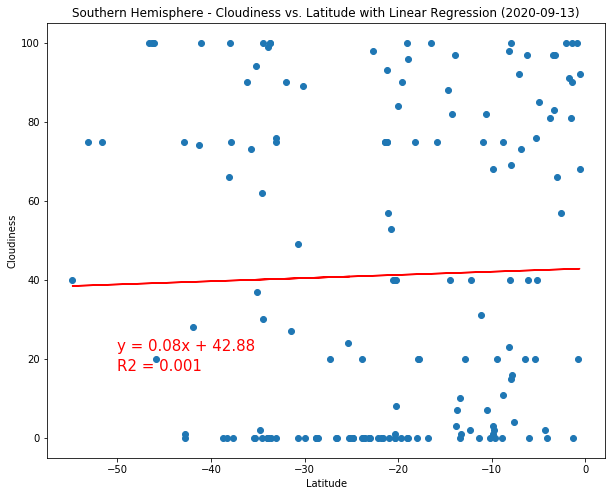

The correlation between Latitude and Cloudiness is: 0.027


In [60]:
# Southern Hemisphere - Cloudiness vs. Latitude Linear Regression

# Data for X-Axis (latitude)
southern_latitude_axis = latitude_south_df.groupby(latitude_south_df["City"])["Latitude"].mean()
southern_latitude_axis

# Data for Y-axis (Cloudiness)
southern_cloudiness_axis = latitude_south_df.groupby(latitude_south_df["City"])["Cloudiness"].mean()
southern_cloudiness_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_latitude_axis, southern_cloudiness_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = southern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(southern_latitude_axis, southern_cloudiness_axis)

# Plot the regression line
plt.plot(southern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 22), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50, 17), fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(southern_latitude_axis, southern_cloudiness_axis)[0],3)
print(f"The correlation between Latitude and Cloudiness is: {correlation}")


In [ ]:
# There is no correlation with Cloudiness vs Latitude for the Southern Hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003


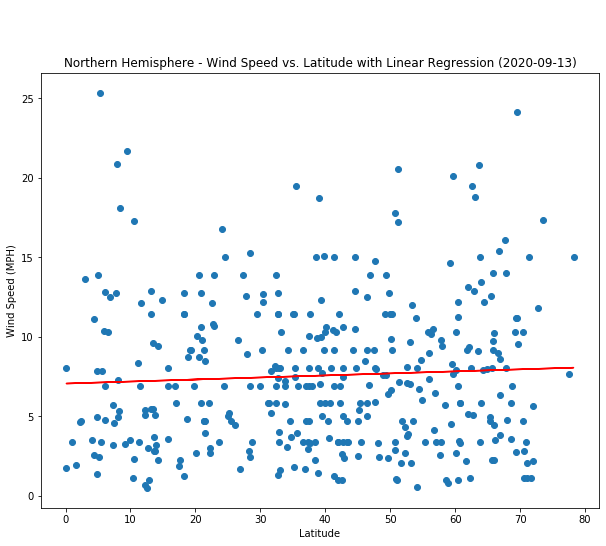

The correlation between Latitude and Wind Speed is: 0.055


In [61]:
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression

# Data for X-Axis (latitude)
northern_latitude_axis = latitude_north_df.groupby(latitude_north_df["City"])["Latitude"].mean()
northern_latitude_axis

# Data for Y-axis (Wind Speed)
northern_windspeed_axis = latitude_north_df.groupby(latitude_north_df["City"])["Wind Speed"].mean()
northern_windspeed_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_latitude_axis, northern_windspeed_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = northern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(northern_latitude_axis, northern_windspeed_axis)

# Plot the regression line
plt.plot(northern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (30, 30), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (30,28), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(northern_latitude_axis, northern_windspeed_axis)[0],3)
print(f"The correlation between Latitude and Wind Speed is: {correlation}")


In [ ]:
# There is no correlation with Wind Speed vs Latitude for the Northern Hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025


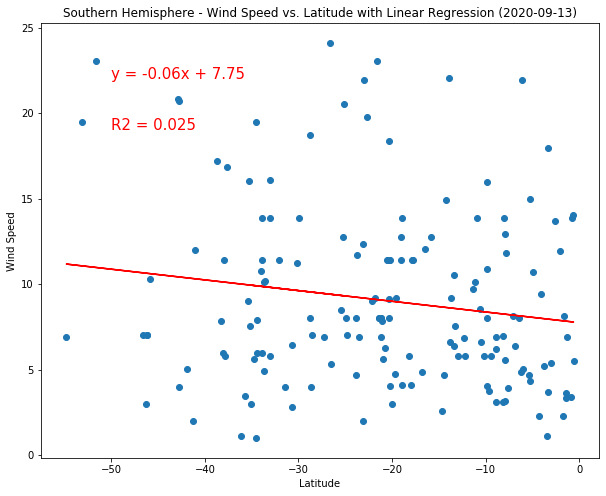

The correlation between Latitude and Wind Speed is: -0.158


In [62]:
# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression

# Data for X-Axis (latitude)
southern_latitude_axis = latitude_south_df.groupby(latitude_south_df["City"])["Latitude"].mean()
southern_latitude_axis

# Data for Y-axis (Wind Speed)
southern_windspeed_axis = latitude_south_df.groupby(latitude_south_df["City"])["Wind Speed"].mean()
southern_windspeed_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_latitude_axis, southern_windspeed_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = southern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(southern_latitude_axis, southern_windspeed_axis)

# Plot the regression line
plt.plot(southern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 22), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50, 19), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(southern_latitude_axis, southern_windspeed_axis)[0],3)
print(f"The correlation between Latitude and Wind Speed is: {correlation}")


In [ ]:
# There is no correlation with Wind Speed vs Latitude for the Southern Hemisphere. 